# Download the data

In [1]:
import os
import tarfile
import urllib

In [2]:
DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2/blob/58e00c65958dc4f51024adb41db40a3b4111c755/datasets/housing/"
HOUSING_PATH=os.path.join('datasets','housing')
HOUSING_URL = DOWNLOAD_ROOT + "housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data() 

ReadError: file could not be opened successfully:
- method gz: ReadError('not a gzip file')
- method bz2: ReadError('not a bzip2 file')
- method xz: ReadError('not an lzma file')
- method tar: ReadError('invalid header')

In [5]:
import pandas as pd

In [6]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path="datasets/housing/housing.csv"
    return pd.read_csv(csv_path)

# Take a Quick Look at the Data Structure

In [7]:
housing=load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
%matplotlib inline
import matplotlib.pyplot as plt


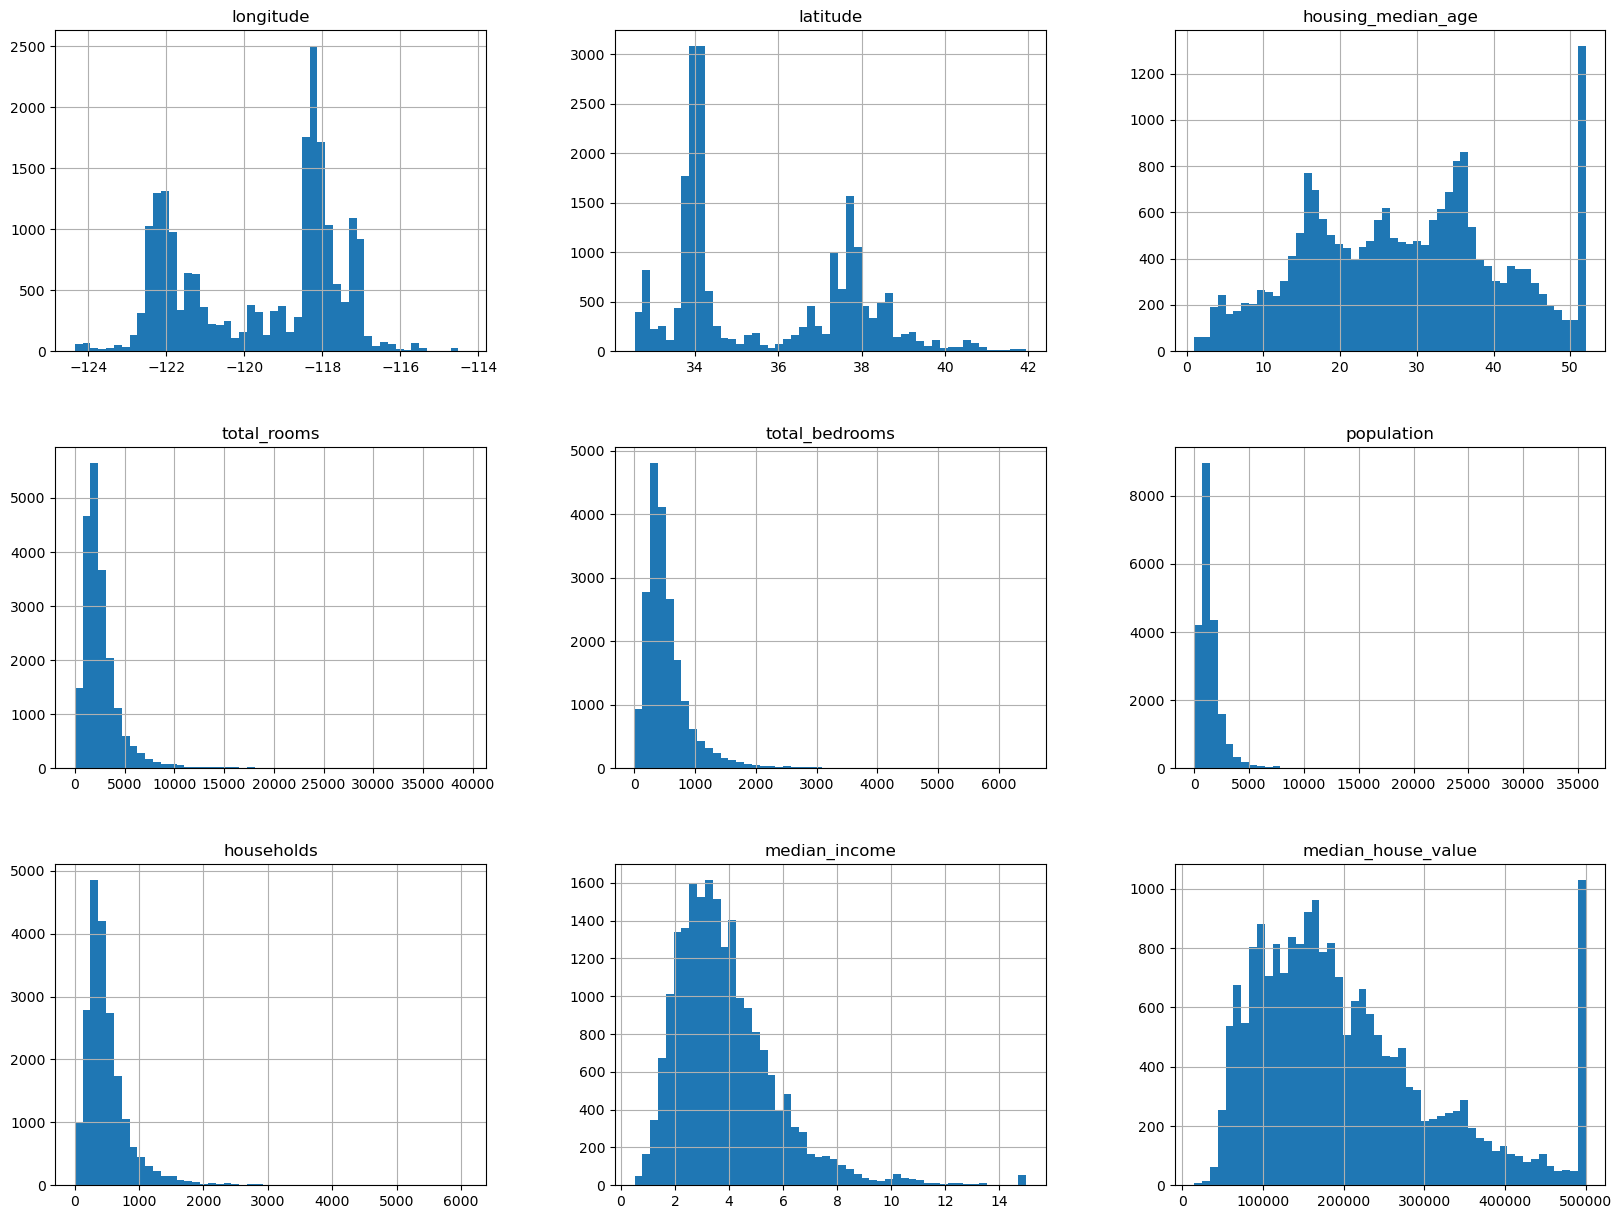

In [11]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [12]:
import numpy as np


In [13]:
# Create function for own train and test split 

In [14]:
def split_train_test(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [15]:
train_set, test_set = split_train_test(housing,0.2)

In [16]:
train_set.shape

(16512, 10)

In [17]:
test_set.shape

(4128, 10)

# Use scikit-learn for split data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_set, test_set =train_test_split(housing,test_size=0.2,random_state=30)

## Create a histogram of income categories based in bins

In [20]:
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.0,np.inf], labels=[1,2,3,4,5])

<AxesSubplot: >

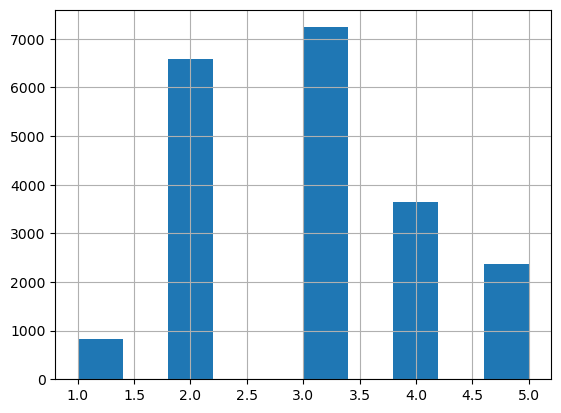

In [21]:
housing["income_cat"].hist()

# Stratified sampling based on the income category

In [22]:
from sklearn.model_selection import StratifiedShuffleSplit

In [23]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [24]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [25]:
for set_ in (strat_test_set,strat_train_set):
    set_.drop("income_cat",axis=1,inplace=True)

# Discover and visualize the Data to Gain Insights

In [26]:
housing_1=strat_test_set.copy()

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

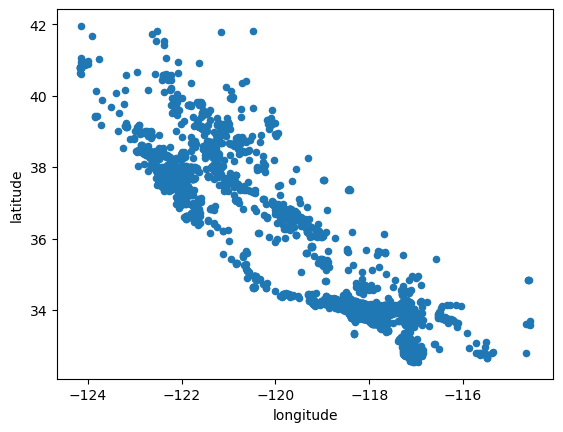

In [27]:
housing_1.plot(kind="scatter",x="longitude", y="latitude")

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

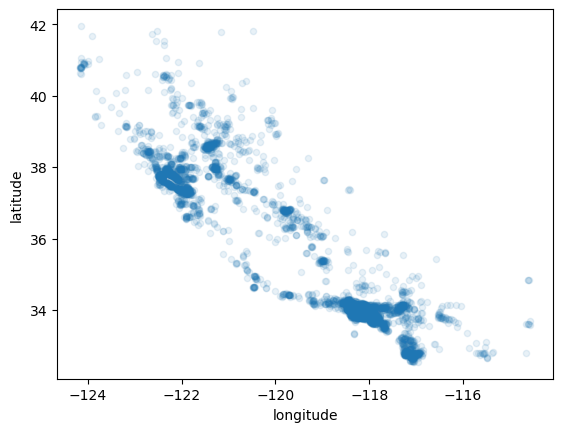

In [28]:
housing_1.plot(kind="scatter",x="longitude", y="latitude",alpha=0.1)

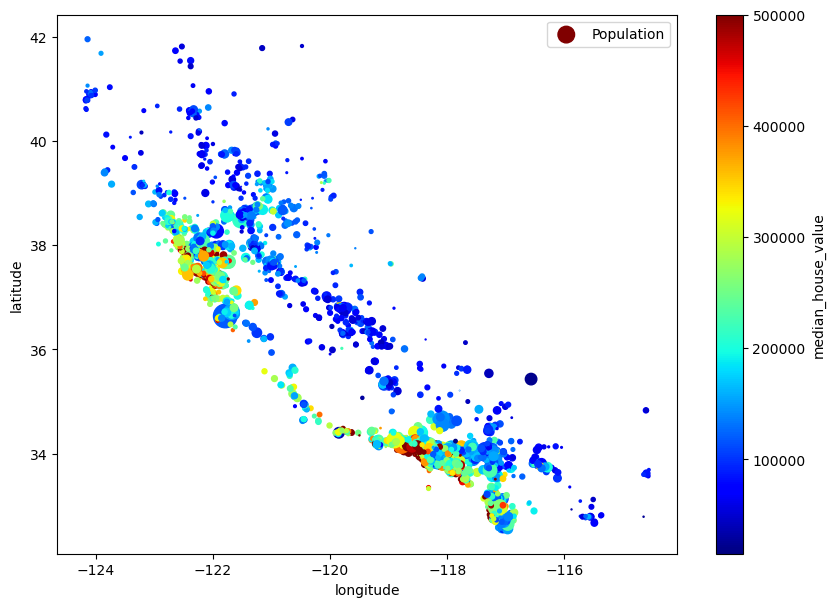

In [29]:
housing_1.plot(kind="scatter",x="longitude", y="latitude",s=housing_1["population"]/100,label="Population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

# Looking Correlations

In [30]:
corr_matrix=housing_1.corr()

C:\Users\Dharmesh\AppData\Local\Temp\ipykernel_26084\1292219983.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=housing_1.corr()


In [31]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691867
total_rooms           0.131296
housing_median_age    0.071210
households            0.070947
total_bedrooms        0.057247
population           -0.016164
longitude            -0.039848
latitude             -0.150336
Name: median_house_value, dtype: float64

In [32]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

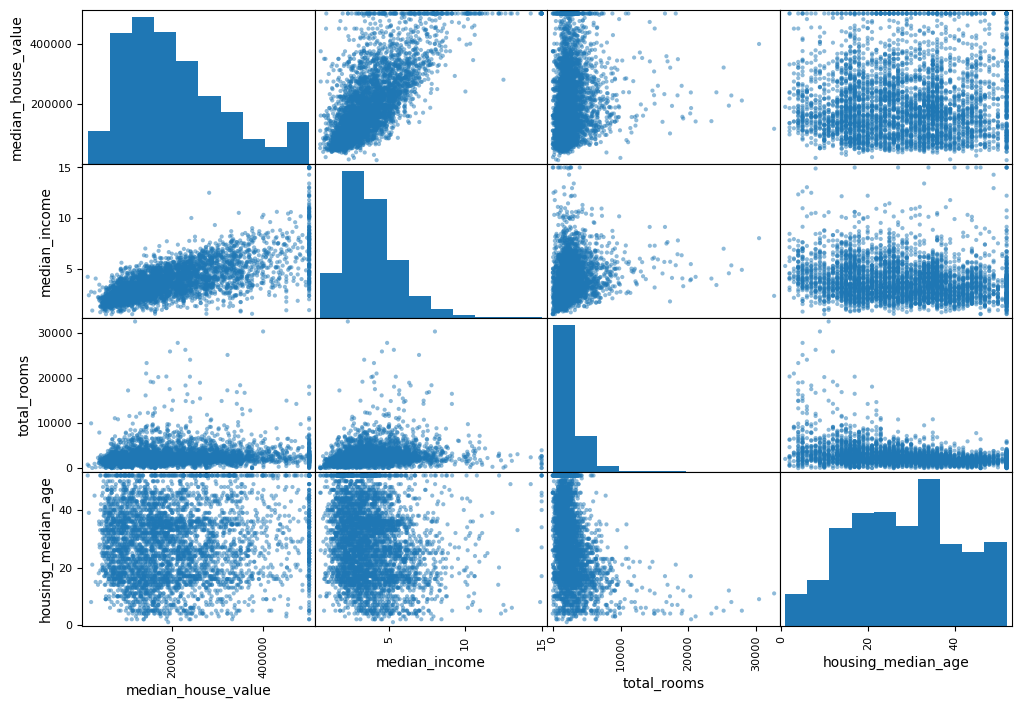

In [33]:
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing_1[attributes],figsize=(12,8))

<AxesSubplot: xlabel='median_income', ylabel='median_house_value'>

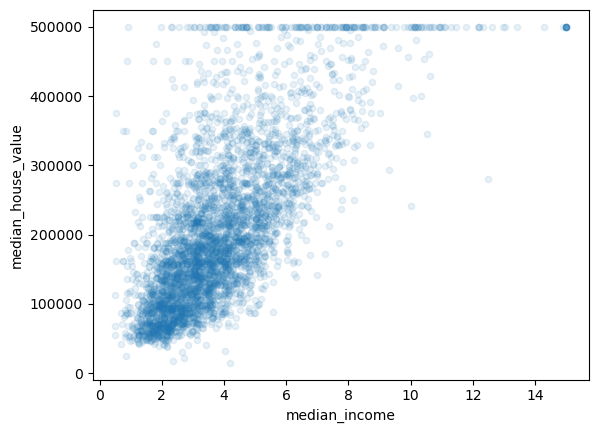

In [34]:
housing_1.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [35]:
housing_1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


In [36]:
housing_1["rooms_per_household"]=housing_1["total_rooms"]/housing_1["households"]
housing_1["bedrooms_per_room"]=housing_1["total_bedrooms"]/housing_1["total_rooms"]
housing_1["population_per_household"]=housing_1["population"]/housing_1["households"]

In [37]:
corr_matrix=housing_1.corr()

C:\Users\Dharmesh\AppData\Local\Temp\ipykernel_26084\1292219983.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=housing_1.corr()


In [38]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.691867
rooms_per_household         0.192731
total_rooms                 0.131296
housing_median_age          0.071210
households                  0.070947
total_bedrooms              0.057247
population                 -0.016164
longitude                  -0.039848
population_per_household   -0.134999
latitude                   -0.150336
bedrooms_per_room          -0.240481
Name: median_house_value, dtype: float64

# Prepare the data for Machine Learning Algorithms

In [39]:
housing=strat_test_set.drop("median_house_value",axis=1)
housing_labels=strat_test_set["median_house_value"].copy()

### Data Cleaning

In [40]:
#housing["total_bedrooms"].fillna(median,inplace=True)

In [41]:
from sklearn.impute import SimpleImputer

In [42]:
imputer =SimpleImputer(strategy="median")

In [43]:
housing_num=housing.drop("ocean_proximity",axis=1)

In [46]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [47]:
imputer.statistics_

array([-118.46  ,   34.22  ,   28.    , 2159.5   ,  442.    , 1172.5   ,
        416.    ,    3.5132])

In [48]:
housing_num.median().values

array([-118.46  ,   34.22  ,   28.    , 2159.5   ,  442.    , 1172.5   ,
        416.    ,    3.5132])

In [49]:
X=imputer.transform(housing_num)

##### housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

# Handling Text and Categorical Attributrs

In [50]:
housing_cat=housing[["ocean_proximity"]]

In [51]:
housing_cat.head(10)

,ocean_proximity
5241,<1H OCEAN
17352,<1H OCEAN
3505,<1H OCEAN
7777,<1H OCEAN
14155,NEAR OCEAN
7057,<1H OCEAN
33,NEAR BAY
17049,NEAR OCEAN
18164,<1H OCEAN
10444,NEAR OCEAN


In [52]:
from sklearn.preprocessing import OrdinalEncoder

In [53]:
ordinal_encoder=OrdinalEncoder()

In [54]:
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)

In [55]:
housing_cat_encoded[10]

array([0.])

In [56]:
housing_cat_encoded.dtype

dtype('float64')

In [57]:
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [0.],
       [3.],
       [4.],
       [0.],
       [4.]])

In [58]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with representation is that ML algorithims will assume that two nearby values are more similar than rwo distant values. </br>
his may be more fine in come cases( e.g., for ordered catergories such as </br>
"bad", "average","good", and "excellent"), but its is oviously not the case for `ocean_proximity` column. </br>
To fix this issue, a common solution is to create a binary attribute per category:- ONEHOTENCODER.</br>

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
cat_encoder= OneHotEncoder()

In [61]:
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [62]:
housing_cat_1hot

<4128x5 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

In [63]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [64]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# Custom Transformers

In [65]:
from sklearn.base import BaseEstimator,TransformerMixin

In [66]:
room_ix,bedrooms_ix,population,households_ix=3,4,5,6

In [ ]:
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
            self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self 
    def transform(self,X,y=None):
        